# Задание

### Основная часть

* Попробовать построить графики из тех, что были на уроке по Seaborn и Matplotlib
* Важно чтобы у каждого из графиков был как минимум один в комментариях или markdown

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [7]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head(20)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.00,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.00,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.00,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.00,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.00,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.00,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.00,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.00,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.00,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.00,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.00,0.00,0.00000,NaN,3915.032892,4.383411,6065.052515


In [55]:
max(list(df['dc_trx_cnt']))

2970

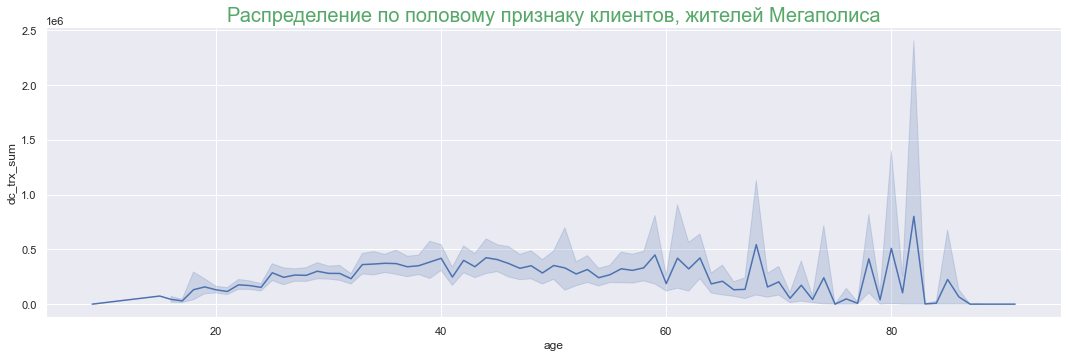

In [20]:
sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='dc_trx_sum', 
    data=df.query("city_type == 'Mega'"), 
    kind='line',
    aspect=3
)
plt.title('Сумма трат по картам клиентов, жителей Мегаполиса', size=20, color='g');
# Выводы: 
# 1.Наибольшие траты по картам совершают клиенты среднего возраста от 35 до 60 лет
# 2.Наблюдаются аномально большие траты у клиентов старшего возраста на фоне небольших общих трат.

In [49]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

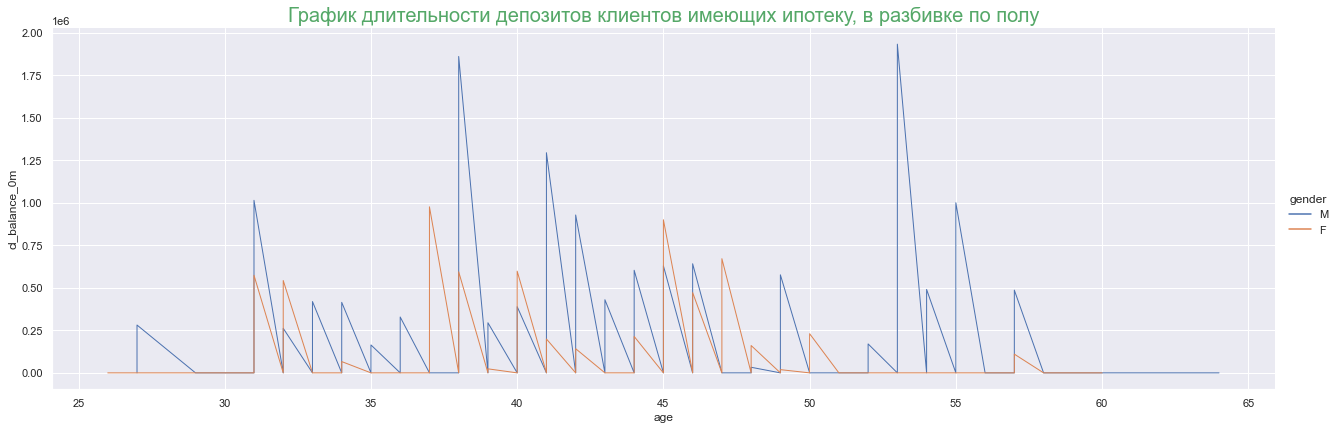

In [59]:
gender_order = ['М', 'F']
sns.relplot(
    x='age', 
    y='cl_balance_0m',
    hue='gender', 
    hue_order=gender_order,
    data=df.query("ml_balance > 0"), 
    estimator=None, 
    lw=1, 
    height=6, 
    aspect=3,
    kind='line')
plt.title('Сумма всех кредитов клиентов имеющих ипотеку, в разбивке по полу', size=20, color='g');
# Выводы: 
# 1.Сумма кредитов у мужчин больше чем у женщин

In [68]:
long_df = pd.melt(df, var_name='Balans', value_name='Costs', value_vars =['min_td_balance_1q', 'max_td_balance_1q'],
            id_vars=['age', 'gender', 'city_type', 'ml_balance', 'cl_balance_0m', 'td_balance_0m'])
long_df.shape         
long_df.sample(n=5)   

,age,gender,city_type,ml_balance,cl_balance_0m,td_balance_0m,Balans,Costs
65655,37,М,<100,0.0,0.0,0.0,max_td_balance_1q,0.0
22157,45,М,500-1000,0.0,0.0,0.0,min_td_balance_1q,0.0
73333,67,М,<100,0.0,0.0,0.0,max_td_balance_1q,0.0
79577,36,F,<100,0.0,0.0,0.0,max_td_balance_1q,0.0
53771,65,М,<100,0.0,0.0,1100000.0,max_td_balance_1q,1100000.0


In [71]:
long_df.shape

(100000, 8)

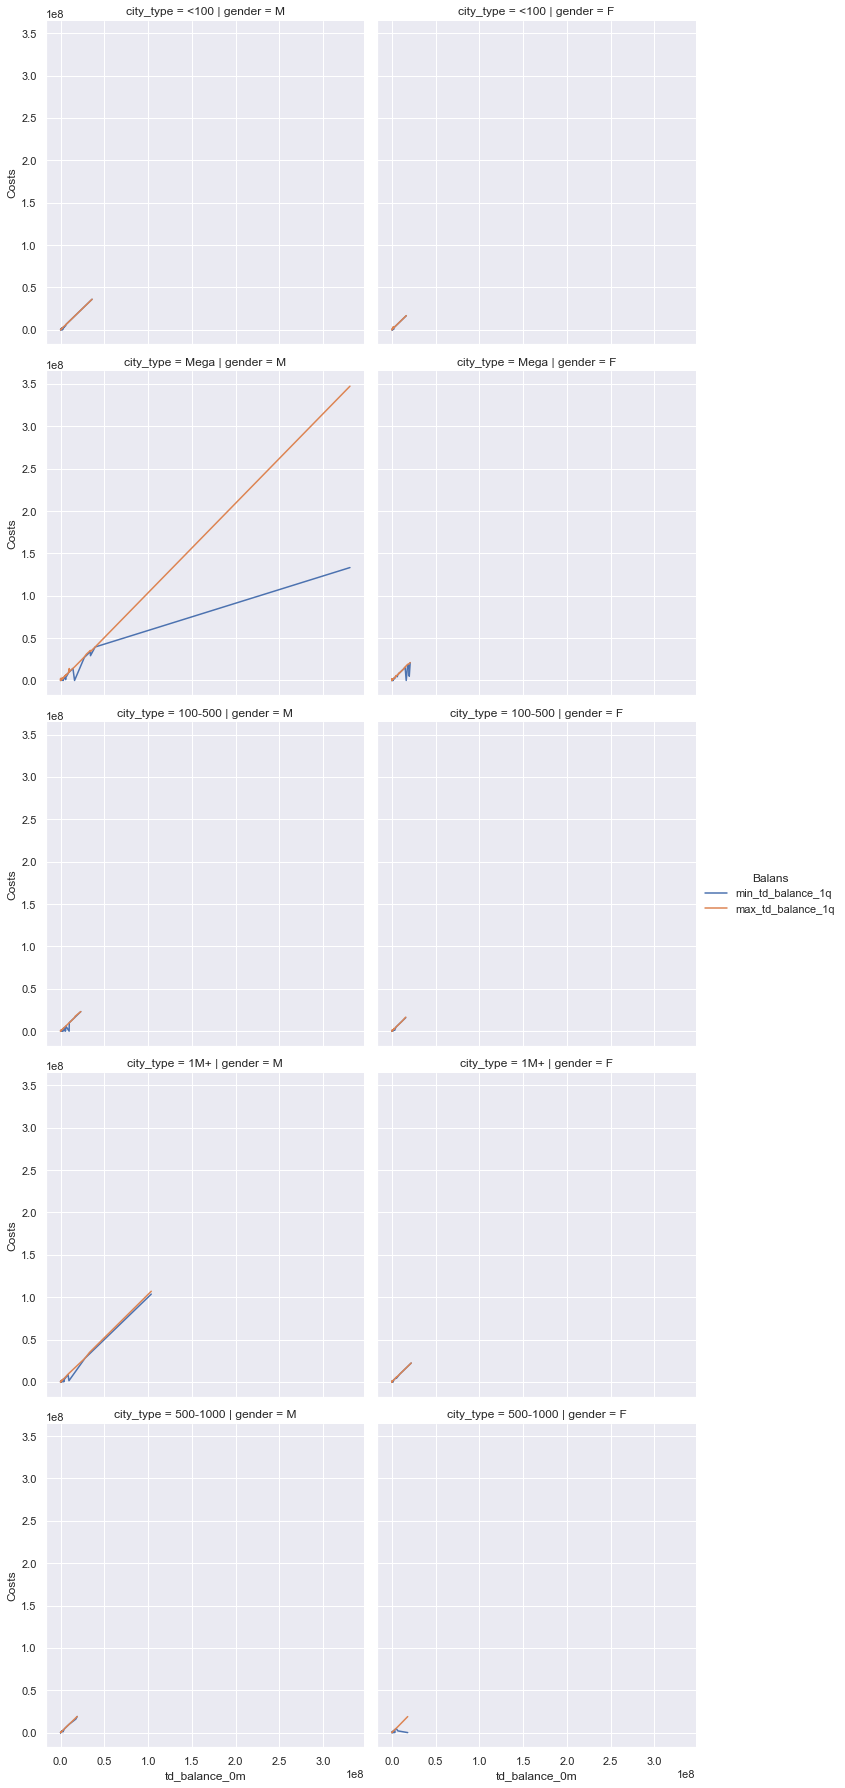

In [72]:
g = sns.relplot(
    x='td_balance_0m', 
    y='Costs', 
    data=long_df, 
    kind='line', 
    hue='Balans', 
    row='city_type', 
    col='gender')
# График показывает был ли отток денежных средств с депозитов, в разбивке по типу города и полу
# Большой отток депозитов наблюдается в Мегаполисах как у мужчин, так и у женщин, а так же в городах от 500 до 1000 тыс жителей среди женщин

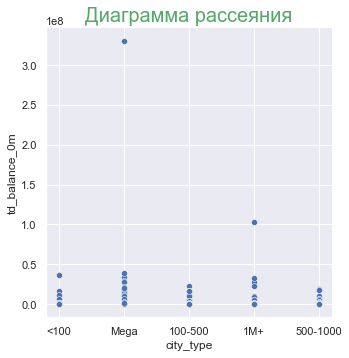

In [80]:
sns.relplot(
    x='city_type',
    y='td_balance_0m',
    data=df,
    kind='scatter'
)
plt.title('Баланс депозитов', size=20, color='g');
# Велечина депозитов по типу городов
# В городах 1М+ и Магаполисах сумма депозитов больше, а так же имеются несколько достаточно большиз депозитов

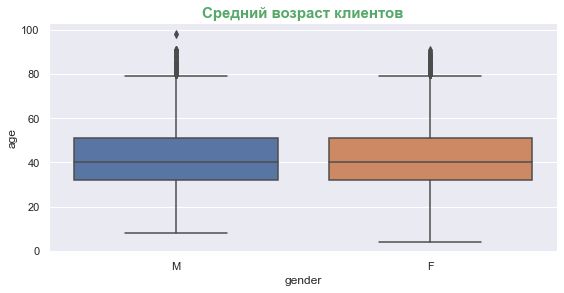

In [102]:
sns.set(style='darkgrid')
sns.catplot(
    x='gender', 
    y='age', 
    data=df, 
    kind='box', 
    height=4, 
    aspect=2)
plt.title('Средний возраст клиентов', size=15, color='g');
# Возраст мужчин и женщин в выборке почти одинаковый. Имеются выбросы, клиенты в возрасте от 80 лет

In [ ]:
long_df2 = pd.melt(df, var_name='age', value_name='Cost', value_vars =['min_td_balance_1q', 'max_td_balance_1q'],
            id_vars=['age', 'gender', 'city_type', 'ml_balance', 'cl_balance_0m', 'td_balance_0m'])
long_df.shape         
long_df.sample(n=5) 

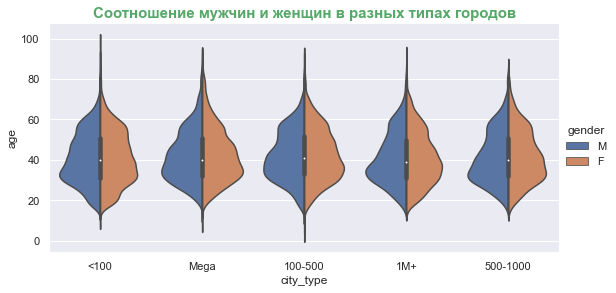

In [104]:
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='violin', 
    hue='gender', 
    hue_order=["М", "F"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('Соотношение мужчин и женщин в разных типах городов', size=15, color='g', weight='bold');
# На графике наблюдаем однородность представленных в датасете данных клиентов по половому и возрастному показателю.

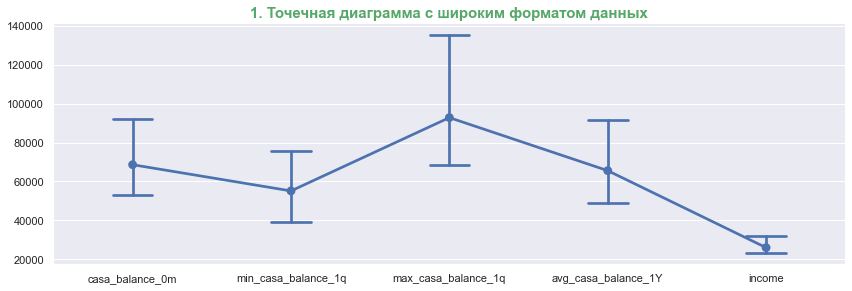

In [111]:
sns.catplot(
    data=df, 
    kind='point', 
    ci=99, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=3, 
    order=['casa_balance_0m', 'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y', 'income']
)
plt.title('Показатели движения д/с по счетам клиентов', size=15, color='g', weight='bold');

In [112]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [113]:
long_df3 = pd.melt(df, var_name='Balans', value_name='Costs', 
                   value_vars =['avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y', 'avg_cl_balance_1Y'],
            id_vars=['age', 'gender', 'city_type'])
long_df3.shape         
long_df3.sample(n=5)   

,age,gender,city_type,Balans,Costs
102039,53,F,<100,avg_loan_balance_1Y,0.000
67730,29,F,100-500,avg_td_balance_1Y,0.000
82732,30,М,100-500,avg_td_balance_1Y,0.000
23135,26,F,1M+,avg_casa_balance_1Y,0.750
26684,57,F,<100,avg_casa_balance_1Y,2267.155


In [120]:
# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
df_avg = pd.DataFrame(long_df3.groupby(["Balans", "city_type"]).Costs.mean())
df_avg = df_avg.reset_index()
df_avg = df_avg.pivot('Balans', 'city_type', 'Costs')
df_avg.head()

city_type,100-500,1M+,500-1000,<100,Mega
Balans,,,,,
avg_casa_balance_1Y,38987.833331,102265.391860,33471.984446,22034.420114,164969.989349
avg_cl_balance_1Y,62717.149110,51205.622222,49994.262387,58381.139156,49112.197466
avg_loan_balance_1Y,85144.700506,77612.187775,70358.961689,74756.864017,86426.739978
avg_td_balance_1Y,53769.475982,63694.722589,47998.217621,30947.344574,185720.608000


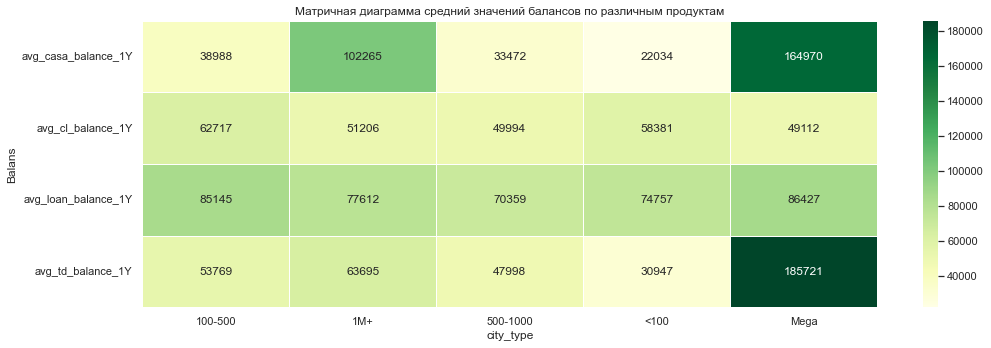

In [133]:
  fig, (ax1) = plt.subplots(1, figsize=(15,5))

sns.heatmap(
    df_avg, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
#     cmap="YlGnBu", 
    cmap="YlGn", 
    ax=ax1)
ax1.set_title('Матричная диаграмма средний значений балансов по различным продуктам')

plt.tight_layout()
plt.show();